<a href="https://colab.research.google.com/github/AnkitaSavaliya/AIH/blob/main/DeepLearning/class/module1/lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from PIL import Image

100%|██████████| 345M/345M [00:19<00:00, 17.4MB/s]


Extracting data/flowers-102/102flowers.tgz to data/flowers-102


100%|██████████| 502/502 [00:00<00:00, 342kB/s]


100%|██████████| 15.0k/15.0k [00:00<00:00, 13.9MB/s]


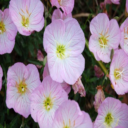

In [2]:
size = (128,128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.Flowers102(root='./data', split='train', download=True, transform=transform)
test_dataset = torchvision.datasets.Flowers102(root='./data', split='test', download=True, transform=transform)

def visualize_image(image):
    image = image.permute(1, 2, 0)
    image = image.numpy()
    image = (image - image.min()) / (image.max() - image.min())
    image = (image * 255).astype('uint8')
    return Image.fromarray(image)

visualize_image(train_dataset[0][0])

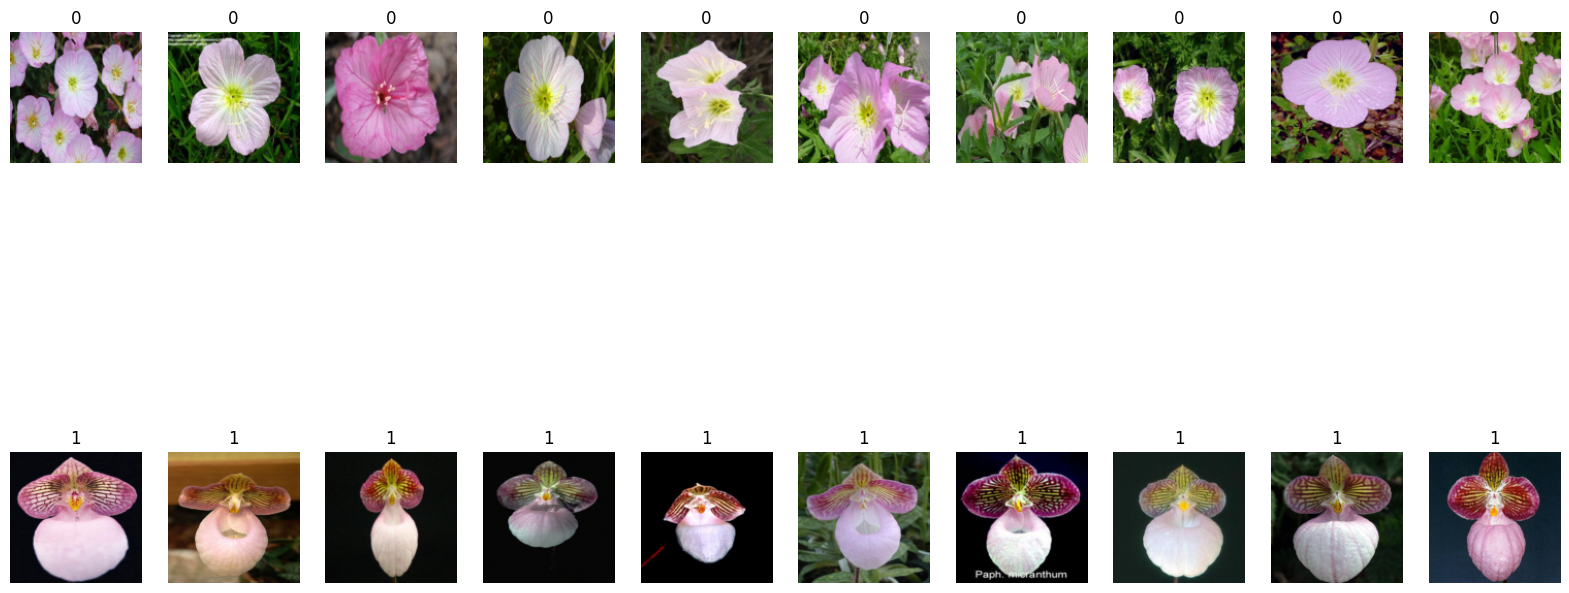

In [3]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(2, 10, figsize=(20, 10))
for i in range(20):
    ax[i // 10, i % 10].imshow(visualize_image(train_dataset[i][0]))
    ax[i // 10, i % 10].axis('off')
    ax[i // 10, i % 10].set_title(train_dataset[i][1])

In [4]:
train_dataset[0][0].shape, type(train_dataset[0][1])

(torch.Size([3, 128, 128]), int)

In [5]:
#combine all images in tensor
train_images = torch.stack([img for img, _ in train_dataset], dim=0)
train_labels = torch.tensor([label for _, label in train_dataset])
train_images.shape, train_labels.shape


(torch.Size([1020, 3, 128, 128]), torch.Size([1020]))

In [6]:
train_labels[10]

tensor(1)

In [7]:
#train_labels <= 1 creates a boolean mask, meaning
mask = train_labels <= 1
print(mask)

#Now, when we use this boolean mask to index train_labels:

train_labels_01 = train_labels[mask]
print(train_labels_01)
# Output: tensor([0, 1, 1, 0])

tensor([ True,  True,  True,  ..., False, False, False])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [8]:
train_images_01 = train_images[train_labels <= 1]
train_labels_01 = train_labels[train_labels <= 1]

model = torch.nn.Linear(128 * 128 * 3, 1)
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0)

for epoch in range(100):
    pred_y = model(train_images_01.view(-1, 128 * 128 * 3))
    loss_value = loss(pred_y, train_labels_01.float().view(-1, 1))

    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()

    if epoch % 10 == 0:
      print(f"Epoch {epoch + 1}: Loss = {loss_value.item()}")


Epoch 1: Loss = 0.5294819474220276
Epoch 11: Loss = 0.11742009222507477
Epoch 21: Loss = 0.07470037043094635
Epoch 31: Loss = 0.057476840913295746
Epoch 41: Loss = 0.04634029418230057
Epoch 51: Loss = 0.038144953548908234
Epoch 61: Loss = 0.03182576596736908
Epoch 71: Loss = 0.026815693825483322
Epoch 81: Loss = 0.022764001041650772
Epoch 91: Loss = 0.019438650459051132


In [9]:
# first prepare data(we took entire dataset, only wanted to train label 1 and 0)
# set up model, loss fn, create optimizer
# iterate over training to reduce loss


In [ ]:
test_images = torch.stack([img for img, _ in test_dataset], dim=0)
test_labels = torch.tensor([label for _, label in test_dataset])
#get subset which has label 0 or 1
test_images_01 = test_images[test_images <= 1]
test_labels_01 = test_labels[test_images <= 1]


In [ ]:
pred_y = model(test_images_01.view(-1, 128 * 128 * 3))
loss_value = loss(pred_y, test_labels_01.float().view(-1, 1))
print(loss_value, test_labels_01.float().view(-1, 1))